# Purpose of the Code

The goal of this notebook is to extract IMU signals recorded using Trigno system, process the raw data, extract meaningful features, and store the resulting information in a structured DataFrame format.

## Environment Setup

In [1]:
# pip install libemg  # Required only if you have never installed the libemg package
# pip install --upgrade paramiko cryptography  # Needed during first-time installation of libemg to resolve dependencies

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../lib')
from import_emg_file import import_data_from_trigno
from trigno_utils import trigno_dataframe_edit, trigno_extract_muscle_acc, trigno_extract_muscle_emg
from emg_utils import plot_emg_signal, emg_filters, extract_emg_windows, extract_emg_features
from features_utils import combine_multiple_features_lists, detect_segments, assign_emg_labels

In [3]:
# Parameters
intensity = "all"  # Intensity of the task: "light", "medium", or "heavy"
muscle_names = ["biceps", "triceps", "forearm1", "forearm2"]  # Target muscle: "biceps", "triceps", "forearm1", or "forearm2"
axes = ["X", "Y", "Z"] # Possible axes: X, Y, Z
muscle_ref = "biceps" # Reference muscle for true label assignment
w_d = 0.2  # Window duration in seconds for feature extraction
ov = 0.5  # Overlap percentage between windows (e.g., 0.5 = 50%)
n_lifts = 3  # Number of lifts
fs_list = []  # Initialize list to store sampling frequencies

# Feature lists
features_list_norm = ['MAV', 'WL', 'RMS', 'VAR', 'IAV', 'LD', 'SAMPEN', 'MPK']  # Features on normalized signal
features_list_filt = ['ZC', 'SSC', 'KURT', 'SKEW', 'WAMP']  # Features on filtered signal
features_list_freq = ['MNF', 'MNP', 'SM', 'ISD']  # Frequency-domain features

# Paths for input and output
input_folder = f'../../data/acquisitions/trigno/05_14/{intensity}/'  # Input folder with raw data
output_folder = '../../data/extracted_features/trigno/S01_05_14/features'  # Output folder to save extracted features
output_filename = f"features_{intensity}.csv"  # Name of the output CSV file

# Loading Data Files

In [4]:
dataframes = import_data_from_trigno(input_folder)  # Import raw data from Trigno folder
dataframes = [trigno_dataframe_edit(df) for df in dataframes]  # Format each imported dataframe

In [5]:
muscle_acc, acc_time = trigno_extract_muscle_acc(dataframes, muscle_names)  # Extract EMG signals and timestamps for the specified muscle

In [6]:
muscle_emg_raw, emg_time = trigno_extract_muscle_emg(dataframes, muscle_names) 

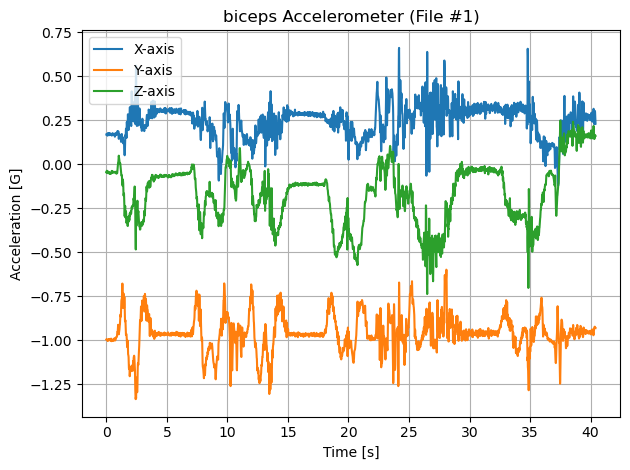

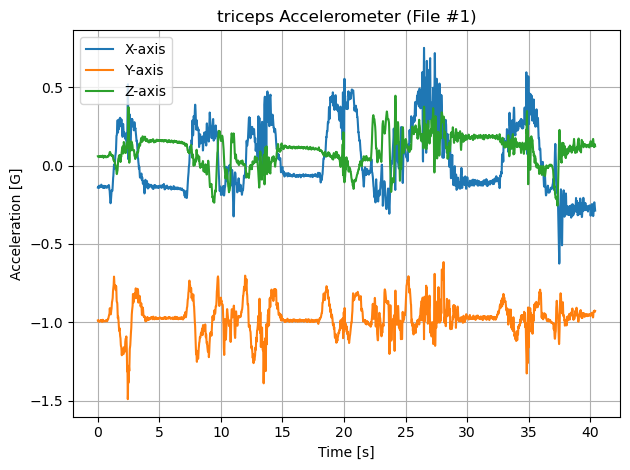

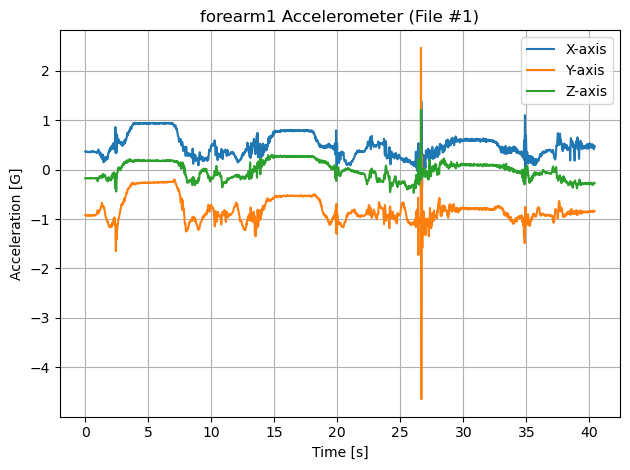

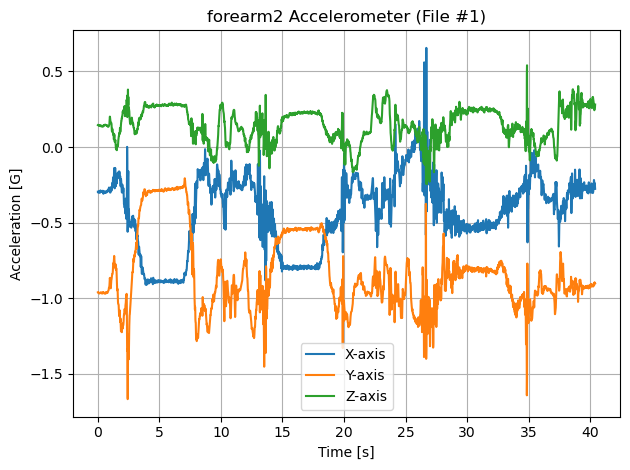

In [7]:
axes = ["X", "Y", "Z"]

for muscle in muscle_names:
    time = acc_time[0]

    for axis in axes:
        signal = muscle_acc[muscle][axis][0]
        plt.plot(time, signal, label=f"{axis}-axis")

    plt.title(f"{muscle} Accelerometer (File #1)")
    plt.xlabel("Time [s]")
    plt.ylabel("Acceleration [G]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

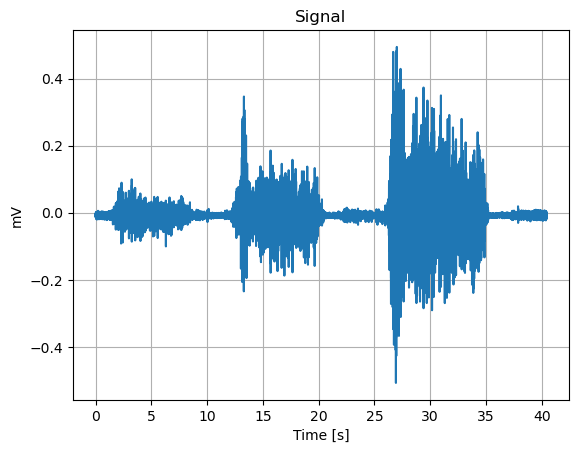

In [8]:
plot_emg_signal(muscle_emg_raw[muscle_names[0]][0], emg_time[0])